# **College Football Playoffs 2025 Simulation**

### ESPN's SP+ data quantifies the offense, defense, and overall rating of all 136 Division 1 FBS teams. The difference in two teams' overall rating corresponds to the point spread for that matchup. This point spread can be converted to a win percentage for each team. Using this data, the winning percentage for any D1 college football matchup can be determined.

### The 2024 College Football Playoffs feature 12 ranked teams facing off in a tournament-style bracket. The four highest ranked teams - 1. Oregon, 2. Georgia, 3. Boise State, and 4. Arizona State - recieve a first round bye. The remaining teams - 5. Texas, 6. Penn State, 7. Notre Dame, 8. Ohio State, 9. Tennessee, 10. Indiana, 11. SMU, and 12. Clemson fill in as follows:

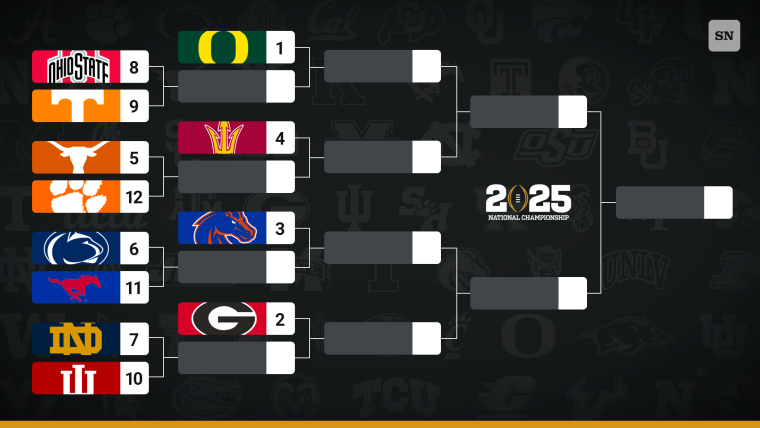


### For 12 teams playing 11 total games, this bracket can be filled out in 2048 different ways. Using the SP+ rankings, each of these 2048 brackets can be simulated and its corresponding likelihood can be calculated. This tool performs these simulations to predict championship odds, the number of games each team is likely to play, and the most likely bracket.

In [ ]:
import numpy as np
import pandas as pd
import itertools
import os

In [ ]:
def lookup(id1, id2):
    '''
    Lookup function to find specific matchup probabilites from imported ESPN data stored in df

    id1: ID of winning team
    id2: ID of losing team
    Out: probability of id1 beaing id2
    '''
    higher_seed = min(id1, id2)
    lower_seed = max(id1, id2)
    col = list(matchup_data[names[higher_seed]])
    prob = col[lower_seed-1] * .01
    if id1==lower_seed:
        prob = 1-prob

    return prob

def build_game(code_id, rounda, roundb, num, games_played, round_prob):
    if code_id==0:
        game_prob = lookup(max(rounda[num]), min(rounda[num]))
        roundb[num].append(max(rounda[num]))
    else:
        game_prob = lookup(min(rounda[num]), max(rounda[num]))
        roundb[num].append(min(rounda[num]))
    games_played[min(rounda[num])]+=1
    games_played[max(rounda[num])]+=1
    round_prob *= game_prob
    return games_played, round_prob

###*scene_list* will hold 2048 entries, with each entry representing one of the 2048 possible brackets. Each entry has 11 booleans, one for each game. A zero represents the underdog beating the favorite, and a one represents the favorite losing to the underdog. The indeces of each game are as follows:

###0.   8 vs. 9
###1.   7 vs. 10
###2.   6 vs. 11
###3.   5 vs. 12
###4.   1 vs. 8/9
###5.   2 vs. 7/10
###6.   3 vs. 6//11
###7.   4 vs. 5/12
###8.   Semi-final (2/3 side)
###9.   Semi-final (1/4 side)
###10.  Championship



In [ ]:
scene_list = [(0,0,0,0,0,0,0,0,0,0,0), (1,1,1,1,1,1,1,1,1,1,1)]
for num_1s in range(10):
    unpermutated_scene = [1] * (1+num_1s) + [0]*(11-(1+num_1s))
    permutations = list(set(itertools.permutations(unpermutated_scene)))
    scene_list += permutations

In [ ]:
# RERUNNIG AFTER FIRST ROUND
scene_list = [(0,0,0,0,0,0,0), (1,1,1,1,1,1,1)]
for num_1s in range(6):
    unpermutated_scene = [1] * (1+num_1s) + [0]*(7-(1+num_1s))
    permutations =  list(set(itertools.permutations(unpermutated_scene)))
    scene_list += permutations

In [ ]:
print(scene_list[4])

(1, 0, 0, 0, 0, 0, 0)


In [ ]:
team_ids = np.arange(1,13,1) # IDs correspond to seeds
max_prob = 0                 # used to find most likely bracket
max_brack = None             # stores most likely bracket
winner_data = {}             # stores the probabilities of winning brackets for each team
gp_data = {}                 # stores the probabilities of each bracket, organized by how many games each team played in each bracket
                             # ex: gp_data[t] = [[prob1], [prob2], [prob3], [prob4]] where probn is the probability of a bracket where team t played n games

# # Bracket setup
# round1 = [[8,9], [5,12], [7,10], [6,11]]
# round2 = [[1], [4], [2], [3]]
# round3 = [[],[],[],[]]
# round4 = []

file_loc = "drive/MyDrive/sp+_spreads.xlsx"
matchup_data = pd.read_excel(file_loc, usecols="B:N", skiprows = [0,14])
matchup_data = matchup_data.rename(columns={'Unnamed: 1': 'xxxx'})
names = list(matchup_data.columns)

In [ ]:
# Setting up organization structures
for id in team_ids:
    winner_data[id] = []
    gp_data[id] = [[],[],[],[]]

games_finished = [1,1,1,1]
if len(games_finished) == 4:
  round_finished = 1
elif len(games_finished) == 8:
  round_finished = 2
elif len(games_finished) == 10:
  round_finished = 3

for code in scene_list: # looping over all 2048 brackets
    games_played = {} # number of games played for each team in the current bracket
    for j in team_ids:
        games_played[j] = 0

    # Bracket setup
    round1 = [[8,9], [5,12], [7,10], [6,11]]
    round2 = [[1], [4], [2], [3]]
    round3 = [[],[],[],[]]
    round4 = [[],[]]
    code = games_finished + list(code)
    round_prob = 1
    game_prob = None


# - - - Simulating round 1 - - -
    round1_winners = code[:4]
    for num, code_id in enumerate(round1_winners):
        games_played, round_prob = build_game(code_id, round1, round2, num, games_played, round_prob)
    if round_finished == 1:
      round_prob = 1

# - - - Simulating round 2 - - -
    round2_winners = code[4:8]
    for num, code_id in enumerate(round2_winners):
        games_played, round_prob = build_game(code_id, round2, round3, num, games_played, round_prob)
    round3 = [[round3[0][0],round3[1][0]], [round3[2][0],round3[3][0]]]
    if round_finished == 2:
      round_prob = 1

# - - - Simulating round 3 - - -
    round3_winners = code[8:10]
    for num, code_id in enumerate(round3_winners):
        games_played, round_prob = build_game(code_id, round3, round4, num, games_played, round_prob)
    round4 = [round4[0][0], round4[1][0]]
    if round_finished == 3:
      round_prob = 1

# - - - Simulating round 4 - - -
    round4_winner = code[-1]
    if round4_winner==0:
        game_prob = lookup(max(round4), min(round4))
        winner = max(round4)
    else:
        game_prob = lookup(min(round4), max(round4))
        winner = min(round4)
    round_prob *= game_prob
    games_played[min(round4)]+=1
    games_played[max(round4)]+=1

# Storing round statistics
    for j in team_ids:
        gp_data[j][games_played[j]-1].append(round_prob)
    winner_data[winner].append(round_prob)
    if round_prob > max_prob:
        max_prob = round_prob
        max_brack = code

#Formatted Printing

In [ ]:
print('\n\n\n\n')
print('- - - - - - - - - - - - - - - \t\t|\t\t- - - - - - - - - - - - - - - - - - - - - - \t\t|\t\t- - - - - - - - - - - - - - - - - - -')
print('- - - Championship Odds - - - \t\t|\t\t- - - Expected Number of Games Played - - - \t\t|\t\t- - - Most Likely Bracket ({:.2f}%) - -'.format(100*max_prob))
print('- - - - - - - - - - - - - - - \t\t|\t\t- - - - - - - - - - - - - - - - - - - - - - \t\t|\t\t- - - - - - - - - - - - - - - - - - -')

games_dict = {}
win_probs, games_played = [0], [0]
for i in team_ids:
    win_probs.append(sum(winner_data[i]))
    games = sum(gp_data[i][0])+2*sum(gp_data[i][1])+3*sum(gp_data[i][2])+4*sum(gp_data[i][3])
    games_played.append(games)
    games_dict[names[i]] = games
name_probs = zip(win_probs, names)
name_probs = sorted(name_probs, reverse=True)
name_games = zip(games_played, names)
name_games = sorted(name_games, reverse=True)

g1 = [9,8]
g2 = [12,5]
g3 = [10,7]
g4 = [11,6]
g5 = [g1[max_brack[0]], 1]
g6 = [g2[max_brack[1]], 4]
g7 = [g3[max_brack[2]], 2]
g8 = [g4[max_brack[3]], 3]
g9 = sorted([g5[max_brack[4]], g6[max_brack[5]]],reverse = True)
g10 = sorted([g7[max_brack[6]], g8[max_brack[7]]],reverse = True)
g11 = sorted([g9[max_brack[8]], g10[max_brack[9]]],reverse = True)
spaced_names = names.copy()
for i in range(len(spaced_names)):
  while len(spaced_names[i]) < 12:
    spaced_names[i]+=' '

brack = {0: spaced_names[8] + '\t'+ spaced_names[1],
         1: spaced_names[9] + '\t'+ spaced_names[g1[max_brack[0]]],
         2: '\t\t' + '\t\t' + spaced_names[g5[max_brack[4]]],
         3: '\t\t' + '\t\t' + spaced_names[g6[max_brack[5]]],
         4: spaced_names[5] + '\t'+ spaced_names[4],
         5: spaced_names[12] + '\t' + spaced_names[g2[max_brack[1]]] + '\t\t   ' + spaced_names[g9[max_brack[8]]],
         6: '\t\t\t\t\t\t\t' + spaced_names[g11[max_brack[10]]],
         7: spaced_names[7] + '\t'+ spaced_names[2] + '\t\t   ' + spaced_names[g10[max_brack[9]]],
         8: spaced_names[10] + '\t'+ spaced_names[g3[max_brack[2]]],
         9: '\t\t' + '\t\t' + spaced_names[g7[max_brack[6]]],
         10: '\t\t' + '\t\t' + spaced_names[g8[max_brack[7]]],
         11: spaced_names[6] + '\t'+ spaced_names[3],
         12: spaced_names[11] + '\t'+ spaced_names[g4[max_brack[3]]],
         }
no_x = []
for i in name_probs:
  if i[1]!='xxxx':
    no_x.append(i)

for i in range(12):
  row = str(no_x[i][1]) + ' '
  for j in range(22 - len(row)):
    row += '-'
  row +=  " {:.2f}%".format(100*(no_x[i][0]))
  row = row +' \t\t|\t\t' + str(name_games[i][1]) + ' '#+ ": {:.2f}".format(name_games[i][0])
  row += '-'*(73-len(row)) + ' {:.2f}'.format(name_games[i][0])
  for j in range(78 - len(row)):
    row += ' '
  row = row + ' \t\t|\t\t' + brack[i]
  print(row)
print('\t\t\t\t\t|\t\t\t\t\t\t\t\t\t|\t\t'+brack[12])
print('\n\n\n\n')






- - - - - - - - - - - - - - - 		|		- - - - - - - - - - - - - - - - - - - - - - 		|		- - - - - - - - - - - - - - - - - - -
- - - Championship Odds - - - 		|		- - - Expected Number of Games Played - - - 		|		- - - Most Likely Bracket (3.37%) - -
- - - - - - - - - - - - - - - 		|		- - - - - - - - - - - - - - - - - - - - - - 		|		- - - - - - - - - - - - - - - - - - -
Texas ---------------- 24.21% 		|		Texas -------------------------------- 3.43 		|		OSU         	Oregon      
PSU ------------------ 18.46% 		|		PSU ---------------------------------- 3.25 		|		Tennessee   	OSU         
OSU ------------------ 17.08% 		|		OSU ---------------------------------- 2.77 		|						OSU         
Oregon --------------- 16.04% 		|		Notre Dame --------------------------- 2.75 		|						Texas       
Georgia -------------- 12.50% 		|		Georgia ------------------------------ 1.80 		|		Texas       	ASU         
Notre Dame ----------- 11.34% 		|		Oregon ------------------------------- 1.77 		|		Clemson     	

#Player Projections
### By calculating the expected number of games to be played by each team, individual player projections are now possible. Using the player's season average PPG, multiplied by their team's expected GP, the total points accumulated over the playoffs is determined.
### The *rosters* dictionary holds each team's roster organized by position. Each position holds a list with a player name, average PPG, and projected playoff points. This is then reformatted and stored in a new dictionary, *player_points*, that stores each player name and their associated PPG and projected point values.

In [ ]:

rosters = {'Oregon': {'QB':['Dillon Gabriel', 24.27],
                      'WR1':['Tez Johnson', 13.87],
                      'WR2':['Evan Stewart', 7.02],
                      'WR3':['Traeshon Holden', 6.7],
                      'RB1':['Jordan James', 18.12],
                      'RB2':['Noah Whittington', 8.64],
                      'TE':['Terrance Ferguson',6.55],
                      'FLX': ['Kenyon Sadiq',3.55],
                      'K':['Atticus Sappington', 6.69],
                      'DEF':[19.69]},
           'Georgia': {'QB':['Carson Beck', 20.35],
                      'WR1':['Arian Smith', 7.93],
                      'WR2':['Dominic Lovett', 7.16],
                      'WR3':['Dillon Bell', 7.16],
                      'RB1':['Trevor Etienne', 14.21],
                      'RB2':['Nate Frazier', 10.02],
                      'TE':['Oscar Delp', 4.22],
                       'FLX': ['Gunner Stockton', 15],
                      'K':['Peyton Woodring', 9.08],
                      'DEF':[15.92]},
            'Boise St': {'QB':['Maddux Madsen', 19.15],
                      'WR1':['Cam Camper', 8.44],
                      'WR2':['Austin Bolt', 3.4],
                      'WR3':['Latrell Caples', 6.19],
                      'RB1':['Ashton Jeanty', 33.95],
                      'RB2':['Dylan Riley', 3.37],
                      'TE':['Matthew Lauter', 6.79],
                      'K':['Jonah Dalmas', 8.23],
                      'DEF':[16.08]},
             'ASU': {'QB':['Sam Leavitt', 22.57],
                      'WR1':['Jordyn Tyson', 14.18],
                      'WR2':['Xavier Guillory', 5.17],
                      'WR3':['Melquan Stovall', 2.05],
                      'RB1':['Cameron Skattebo', 28.32],
                      'RB2':['Kyson Brown', 5.35],
                      'TE':['Chamon Metayer', 4.54],
                      'K':['Ian Hershey', 5.38],
                      'DEF':[15.62]},
              'Texas': {'QB':['Quinn Ewers', 18.76],
                      'WR1':['Matthew Golden', 9.46],
                      'WR2':['Isaiah Bond', 8.42],
                      'WR3':['Deandre Moore', 5.74],
                      'RB1':['Jaydon Blue', 11.92],
                      'RB2':['Tre Wisner', 11.1],
                      'TE':['Gunnar Helm', 7.01],
                      'FLX': ['Ryan Wingo', 4.62],
                      'K':['Bert Auburn', 7.92],
                      'DEF':[25.31]},
               'PSU': {'QB':['Drew Allar', 20.28],
                      'WR1':['Harrison Wallace', 6.75],
                      'WR2':['Omar Evans', 4.62],
                      'WR3':['Liam Clifford', 2.7],
                      'RB1':['Nick Singleton', 15.78],
                      'RB2':['Kaytron Allen', 10.93],
                      'TE':['Tyler Warren', 14.67],
                      'K':['Ryan Barker', 6.91],
                       'FLX': ['Sander Sahaydak', 0],
                      'DEF':[19.54]},
                'Notre Dame': {'QB':['Riley Leonard', 25.31],
                      'WR1':['Beaux Collins', 4.56],
                      'WR2':['Jaden Greathouse', 3.38],
                      'WR3':['Kris Mitchell', 2.58],
                      'RB1':['Jeremiyah Love', 18.12],
                      'RB2':['Jadarian Price', 8.94],
                      'TE':['Mitchell Evans', 3.77],
                      'FLX': ['Jordan Faison', 2.78],
                      'K':['Mitch Jeter', 6.7],
                      'DEF':[24.08]},
                 'OSU': {'QB':['Will Howard', 23.18],
                      'WR1':['Jeremiah Smith', 13.67],
                      'WR2':['Emeka Egbuka', 10.87],
                      'WR3':['Carnell Tate', 7.54],
                      'RB1':['Quinshon Judkins', 12.12],
                      'RB2':['Treveyon Henderson', 10.36],
                      'TE':['Gee Scott', 2.25],
                      'K':['Jarden Fielding', 7.17],
                      'DEF':[26.17]},
                  'Tennessee': {'QB':['Nico Iamaleava', 17.85],
                      'WR1':['Donte Thorton', 8.39],
                      'WR2':['Bru Mccoy', 5.15],
                      'WR3':['Marquarius White', 3.98],
                      'RB1':['Dylan Sampson', 24.55],
                      'RB2':['Desean Bishop', 6.92],
                      'TE':['Miles Kitselman', 4.97],
                      'K':['Max Gilbert', 9.92],
                      'DEF':[22]},
                   'Indiana': {'QB':['Kurtis Rourke', 20.96],
                      'WR1':['Elijah Sarratt', 11.42],
                      'WR2':['Omar Cooper', 8.62],
                      'WR3':['Keshawn Williams', 6.08],
                      'RB1':['Justice Ellison', 12.46],
                      'RB2':['Ty Lawton', 12.23],
                      'TE':['Zach Horton', 3.52],
                      'K':['Nicolas Radicic', 8.17],
                      'DEF':[24]},
                   'SMU': {'QB':['Kevin Jennings', 21.84],
                      'WR1':['Roderick Daniels', 9.09],
                      'WR2':['Keyshawn Smith', 6.27],
                      'WR3':['Jordan Hudson', 5.31],
                      'RB1':['Brashard Smith', 20.69],
                      'RB2':['LJ Johnson', 5.79],
                      'TE':['RJ Maryland', 8.56],
                      'K':['Collin Rogers', 10.92],
                      'DEF':[18.77]},
                   'Clemson': {'QB':['Cade Klubnik', 27.07],
                      'WR1':['Antonio Williams', 12.78],
                      'WR2':['Bryant Wesco', 8.89],
                      'WR3':['TJ Moore', 5.96],
                      'RB1':['Phil Mafah', 12.95],
                      'RB2':['Jamarius Haynes', 3.9],
                      'TE':['Jake Briningstool', 7.34],
                      'K':['Nolan Hauser', 8.62],
                      'DEF':[14]}}

player_points = {}
for team in rosters:
  for position in rosters[team]:
    if position == 'DEF':
      rosters[team]['DEF'].append(rosters[team]['DEF'][0] * games_dict[team])
      player_points[team] = rosters[team]['DEF']
      continue
    rosters[team][position].append(rosters[team][position][1] * games_dict[team])
    player_points[rosters[team][position][0]] = rosters[team][position][1:]

# Fantasy Projections

### After a 6 team fantasy draft took place, the projected final standings were calculated below.

In [ ]:
fteams = {'Chickenhustlers': ['Riley Leonard','Phil Mafah','Cameron Skattebo','Beaux Collins','Matthew Golden','Evan Stewart','Terrance Ferguson','Austin Bolt','Matthew Lauter','Maddux Madsen','Jonah Dalmas','Oregon'],
          'Go BSU!': ['Kurtis Rourke','Jordan James','Ashton Jeanty','Cam Camper','Deandre Moore','Carnell Tate','Kenyon Sadiq','Treveyon Henderson','Ty Lawton','Carson Beck','Sander Sahaydak', 'PSU'],
          'Ralphie the Buffalo': ['Quinn Ewers', 'Trevor Etienne', 'Jeremiyah Love', 'Brashard Smith', 'Harrison Wallace', 'Antonio Williams',  'Oscar Delp', 'Jadarian Price', 'Dylan Sampson', 'Noah Whittington', 'Bert Auburn', 'Georgia'],
          'Ryan Dayatollah': ['Drew Allar','Kaytron Allen','Tre Wisner','Isaiah Bond','Emeka Egbuka','Elijah Sarratt', 'Tyler Warren','Roderick Daniels','Justice Ellison','Kevin Jennings','Ryan Barker', 'OSU'],
          'The Philly Dynasty': ['Will Howard','Nate Frazier','Quinshon Judkins','Tez Johnson','Dominic Lovett','Jeremiah Smith','Mitchell Evans','Jordan Faison','Traeshon Holden','Gunner Stockton','Atticus Sappington', 'Notre Dame'],
          'juangainza': ['Dillon Gabriel','Jaydon Blue','Nick Singleton','Dillon Bell','Omar Evans','Arian Smith','Gunnar Helm','Omar Cooper','Ryan Wingo','Cade Klubnik','Peyton Woodring', 'Texas']}

In [ ]:
team_totals = []
fteam_names = []
for team in fteams:
  team_total = 0
  players = fteams[team]
  for player in players:
    team_total+=player_points[player][-1]
  team_totals.append(team_total)
  fteam_names.append(team + '-'*(25-len(team)))

total_proj = zip(team_totals, fteam_names)
total_proj = sorted(total_proj, reverse=True)

print('- - - - - - - - - - - - - - - - - - - -')
print('- - - - Final Fantasy Standings - - - -')
print('- - - - - - - - - - - - - - - - - - - -\n')
for i, team in enumerate(total_proj):
  print('{}. {} {:.2f}'.format(i+1,team[1], team[0]))


- - - - - - - - - - - - - - - - - - - -
- - - - Final Fantasy Standings - - - -
- - - - - - - - - - - - - - - - - - - -

1. Ryan Dayatollah---------- 360.86
2. juangainza--------------- 336.25
3. Ralphie the Buffalo------ 321.39
4. Go BSU!------------------ 291.60
5. The Philly Dynasty------- 272.25
6. Chickenhustlers---------- 242.48
